In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
def stress_float(lst):
    ''' divide la lista stress in sottoliste per cui rst[0] è l'istante dt da 0 a durata. mentre rst[0][0] è 
    il punto di gauss quindi va da 0 a 7 (essendo 8 i punti). Solo per stress e strain'''
    l = len(lst)
    m = len(lst[0][0])
    rst = [[[float(x) for x in lst[i][0][j].split()] for i in range(l)] for j in range(m)]
    return rst

def disp_float(lst):
     ''' divide la lista degli spostamenti. In questo caso rst[0] è composto dal dt e dalle componenti dello 
     spostamento. Applicabile anche alle pressioni, il risultato sono subliste per gli 8 nodi [dt, p1,..,p8]  '''
     l = len(lst[0]) #dt
     m = len(lst[0][0]) 
     rst = [[float(x) for x in lst[0][i].split()] for i in range(l)]
     return rst

In [133]:
####### LEGGIAMO I FILE OUTPUT DEI PUNTI DI GAUSS
var = [i for i in range(1,9)]
displacement = [s for s in [y.readlines() for y in [open(f'displacement.out','r')]]] 
acceleration = [s for s in [y.readlines() for y in [open(f'acceleration.out','r')]]]
ppressure =  [s for s in [y.readlines() for y in [open(f'porePressure.out','r')]]] 

stress = [s for s in [[y.readlines() for y in [open(f'stress{k}.out','r')]] for k in range(1,9)]]
strain = [s for s in [[y.readlines() for y in [open(f'strain{k}.out','r')]] for k in range(1,9)]]


In [134]:
#####attenzione non applicare più volte la funzione altrimenti suddivide ulteriormente
stress_flt = stress_float(stress)
strain_flt = stress_float(strain)
disp_flt = disp_float(displacement)
acc_flt = disp_float(acceleration)
pwp = disp_float(ppressure)

stress_flt, il risultato è [[[dt (gp1) compomnenti stress gp1],[dt (gp2) stress(gp2)]...[dt gp(8)], [dt(i+1), (gp1)]...
stress_flt[0][0] esempio di dt = 0 e punto di gauss n 1 (lo stesso per strain_flt) il risultato sono le 6 compomnenti dello stress (+eta) o dello strain.\
acc_flt [dt, componenti x y z per gli 8 nodi],[dt(i+1), x(i+1) y(i+1) z(i+1),...] uguale per accelerazione e pwp

In [135]:
####################################### QUERY SUI NODI ##############################
time = [t[0] for t in disp_flt]
### in acc_x ci sono tutte le componenti degli spostamenti x per tutti gli 8 punti, quindi abbiamo una lista di 
### 8 valori per ogni istante di tempo per tutta la durata.
disp_x = [disp_flt[i][1::3] for i in range(len(disp_flt))]
disp_y = [disp_flt[i][2::3] for i in range(len(disp_flt))]
disp_z = [disp_flt[i][3::3] for i in range(len(disp_flt))]

acc_x = [acc_flt[i][1::3] for i in range(len(acc_flt))]
acc_y = [acc_flt[i][2::3] for i in range(len(acc_flt))]
acc_z = [acc_flt[i][3::3] for i in range(len(acc_flt))]

#si toglie la colonna dt a pwp:
pwp_t =  [pwp[i][1::] for i in range(len(pwp))]
################################################## prove #############################
#a = [i for i in range(1000)]
#a[3::3]
#acc_flt[0][1::3]

In [136]:
####################################### QUERY SUI PUNTI DI GAUSS - STRESS ##############################
#stress_flt[dt][gp][sigma]
sigma_xx = [[stress_flt[i][j][1] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
sigma_yy = [[stress_flt[i][j][2] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
sigma_zz = [[stress_flt[i][j][3] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
sigma_xy = [[stress_flt[i][j][4] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
sigma_yz = [[stress_flt[i][j][5] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
sigma_xz = [[stress_flt[i][j][6] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eta = [[stress_flt[i][j][7] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]

In [137]:
####################################### QUERY SUI PUNTI DI GAUSS - STRAIN  ##############################
eps_xx = [[strain_flt[i][j][1] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eps_yy = [[strain_flt[i][j][2] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eps_zz = [[strain_flt[i][j][3] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eps_xy = [[strain_flt[i][j][4] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eps_yz = [[strain_flt[i][j][5] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]
eps_xz = [[strain_flt[i][j][6] for i in range(len(stress_flt))] for j in range(len(stress_flt[0]))]

SPOSTAMENTI

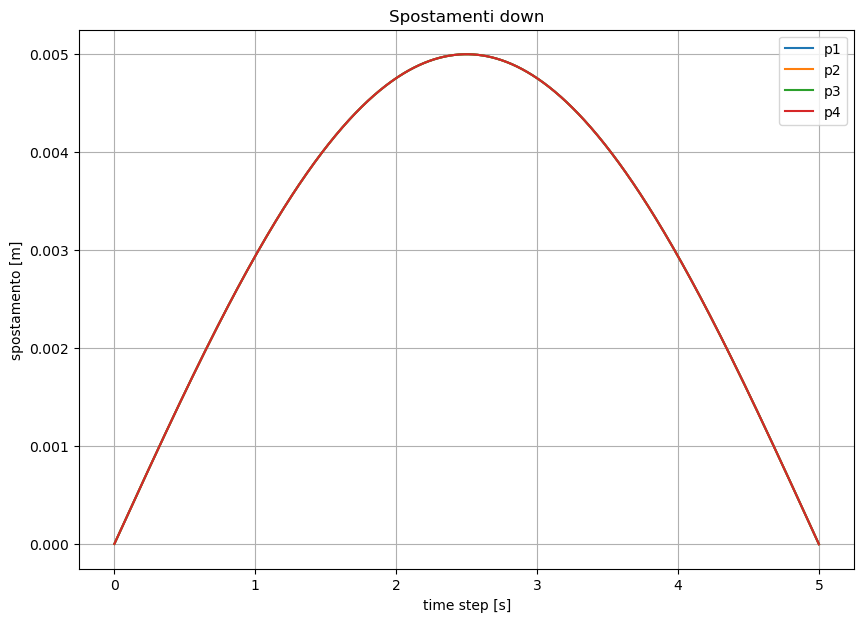

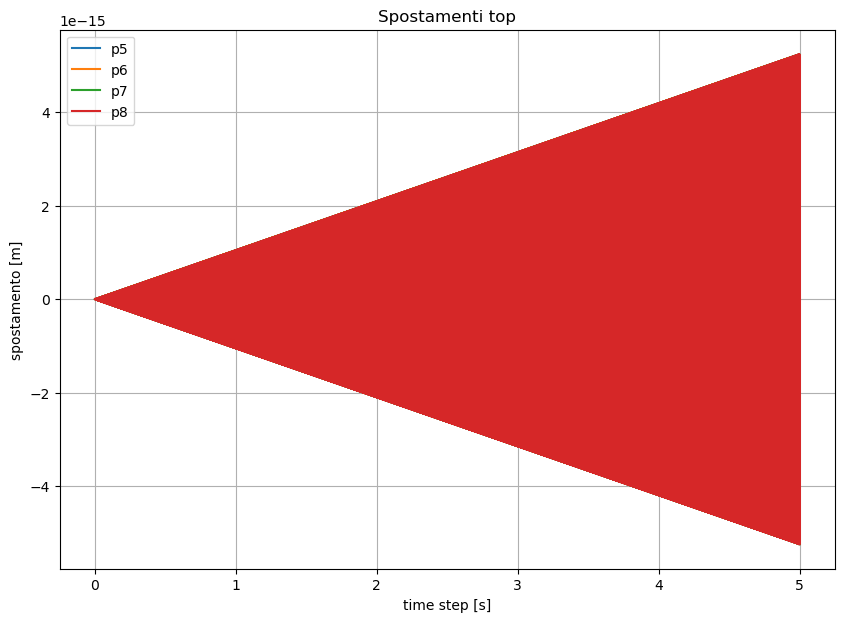

In [138]:
################################## PLOT SPOSTAMENTI PER GLI 8 NODI ####################
disp_x_1 = [x[0] for x in disp_x]
disp_x_2 = [x[1] for x in disp_x]
disp_x_3 = [x[2] for x in disp_x]
disp_x_4 = [x[3] for x in disp_x]

disp_x_down = np.c_[disp_x_1,disp_x_2,disp_x_3,disp_x_4]

disp_x_5 = [x[4] for x in disp_x]
disp_x_6 = [x[5] for x in disp_x]
disp_x_7 = [x[6] for x in disp_x]
disp_x_8 = [x[7] for x in disp_x]

disp_x_top = np.c_[disp_x_5,disp_x_6,disp_x_7,disp_x_8]



fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('Spostamenti down')
ax.set_ylabel('spostamento [m]')
ax.set_xlabel('time step [s]')
ax.grid(True)
#ax.plot(time,np.c_[list1,list2],'g--')
ax.plot(time,np.c_[disp_x_down],label=['p1','p2','p3','p4'])
plt.legend()
plt.show()

fig, ax2 = plt.subplots(figsize=(10,7))
ax2.set_title('Spostamenti top')
ax2.set_ylabel('spostamento [m]')
ax2.set_xlabel('time step [s]')
ax2.grid(True)
#ax.plot(time,np.c_[list1,list2],'g--')
ax2.plot(time,np.c_[disp_x_top],label=['p5','p6','p7','p8'])
plt.legend()
plt.show()


ACCELERAZIONI

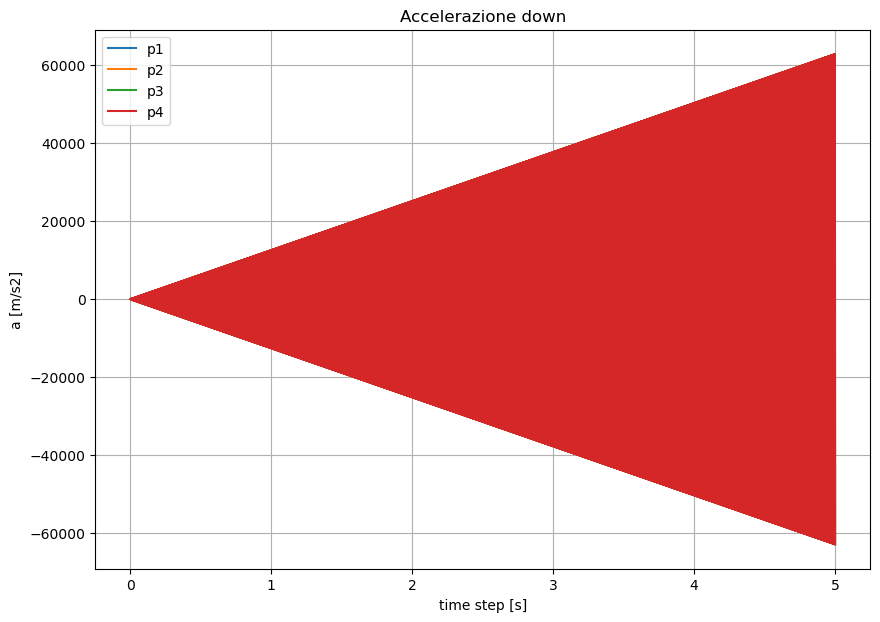

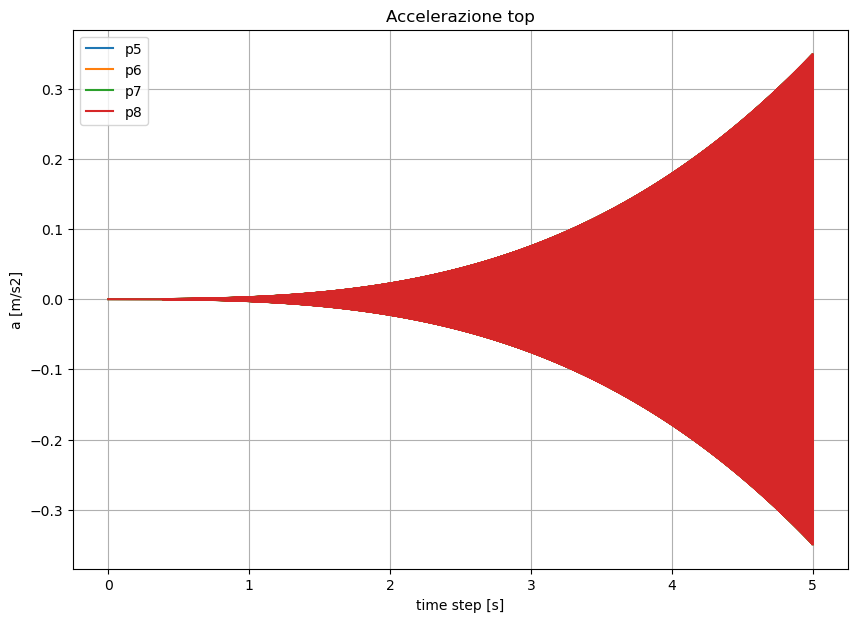

In [139]:
################################## PLOT ACCELERAZIONI PER GLI 8 NODI ####################
acc_x_1 = [x[0] for x in acc_x]
acc_x_2 = [x[1] for x in acc_x]
acc_x_3 = [x[2] for x in acc_x]
acc_x_4 = [x[3] for x in acc_x]

acc_x_down = np.c_[acc_x_1,acc_x_2,acc_x_3,acc_x_4]

acc_x_5 = [x[4] for x in acc_x]
acc_x_6 = [x[5] for x in acc_x]
acc_x_7 = [x[6] for x in acc_x]
acc_x_8 = [x[7] for x in acc_x]

acc_x_top = np.c_[acc_x_5,acc_x_6,acc_x_7,acc_x_8]

fig, ax3 = plt.subplots(figsize=(10,7))
ax3.set_title('Accelerazione down')
ax3.set_ylabel('a [m/s2]')
ax3.set_xlabel('time step [s]')
ax3.grid(True)
ax3.plot(time,np.c_[acc_x_down],label=['p1','p2','p3','p4'])
plt.legend()
plt.show()

fig, ax4 = plt.subplots(figsize=(10,7))
ax4.set_title('Accelerazione top')
ax4.set_ylabel('a [m/s2]')
ax4.set_xlabel('time step [s]')
ax4.grid(True)
ax4.plot(time,np.c_[acc_x_top],label=['p5','p6','p7','p8'])
plt.legend()
plt.show()

SOVRAPRESSIONI

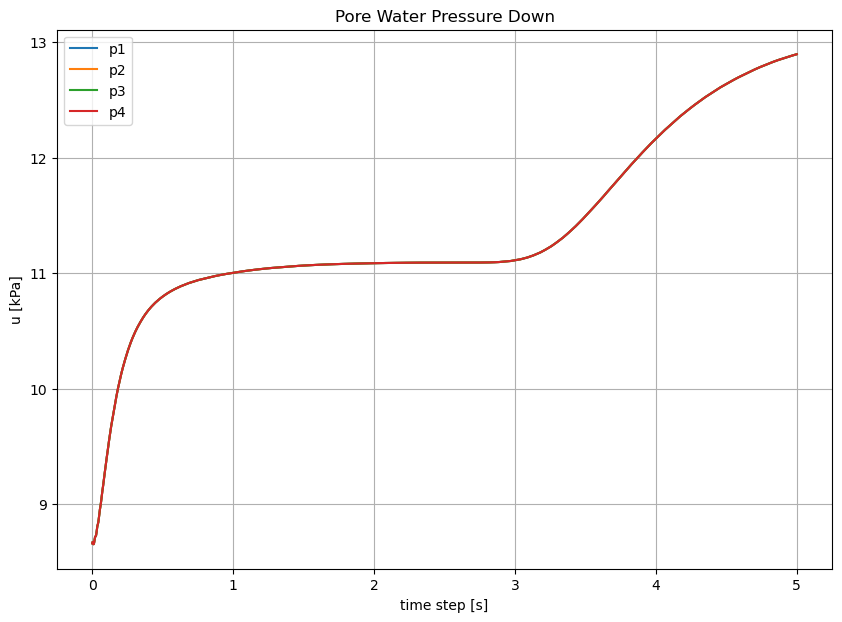

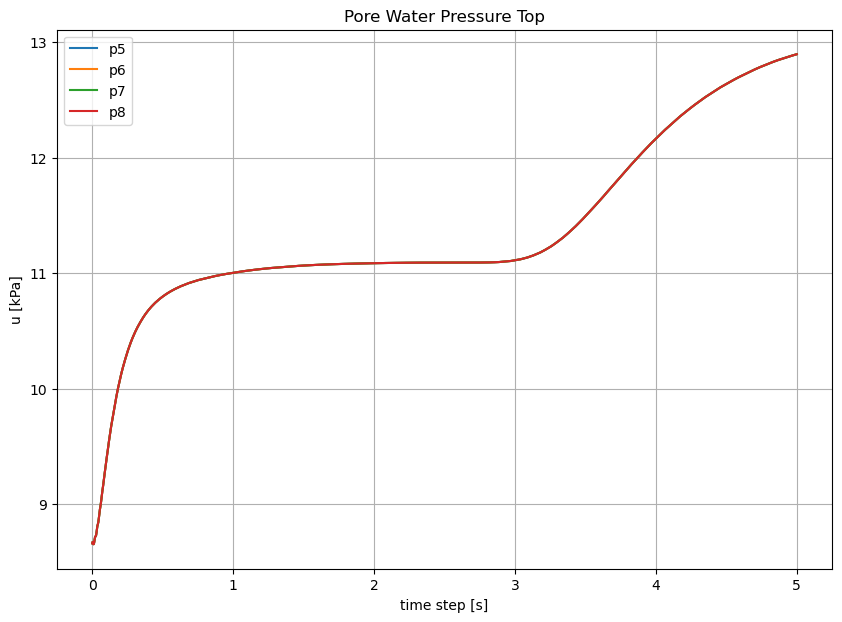

In [140]:
pwp1 = [x[0] for x in pwp_t]
pwp2 = [x[1] for x in pwp_t]
pwp3 = [x[2] for x in pwp_t]
pwp4 = [x[3] for x in pwp_t]

pwp_down = np.c_[pwp1,pwp2,pwp3,pwp4]

fig, pwp = plt.subplots(figsize=(10,7))
pwp.set_title('Pore Water Pressure Down')
pwp.set_ylabel('u [kPa]')
pwp.set_xlabel('time step [s]')
pwp.grid(True)
pwp.plot(time,np.c_[pwp_down],label=['p1','p2','p3','p4'])
pwp.legend()
#pwp.show()


pwp5 = [x[4] for x in pwp_t]
pwp6 = [x[5] for x in pwp_t]
pwp7 = [x[6] for x in pwp_t]
pwp8 = [x[7] for x in pwp_t]

pwp_top = np.c_[pwp5,pwp6,pwp7,pwp8]

fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Pore Water Pressure Top')
pwp2.set_ylabel('u [kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,np.c_[pwp_down],label=['p5','p6','p7','p8'])
pwp2.legend()
#pwp.show()

In [141]:
#sigma_xx[0]

#list1 = [x[0] for x in acc_x]
#list2= [x[5] for x in acc_x]
#a = np.array(list1)
#b = np.array(list2)

STRESS

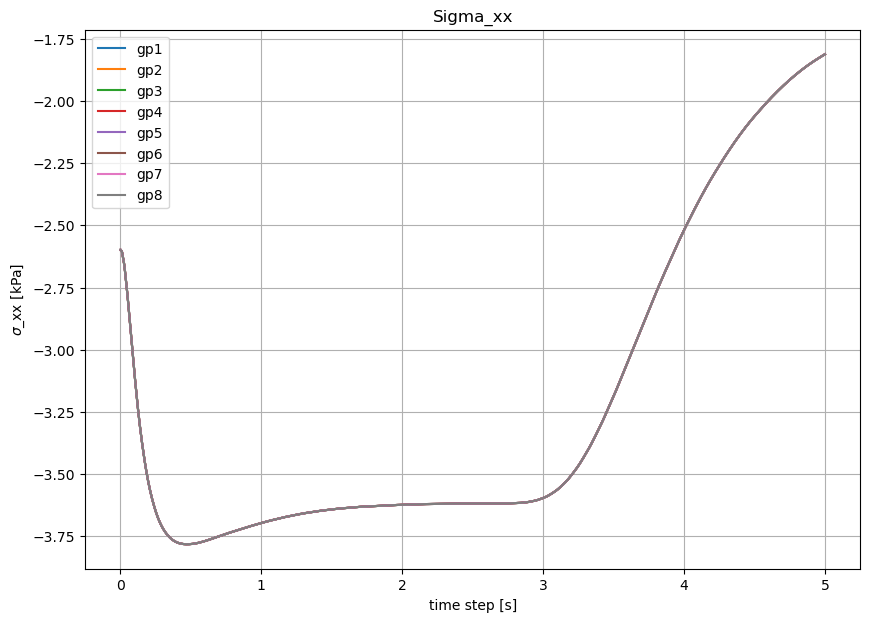

In [142]:
sigma_x = np.c_[sigma_xx[0],sigma_xx[1],sigma_xx[2],sigma_xx[3],sigma_xx[4],sigma_xx[5],sigma_xx[6],sigma_xx[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Sigma_xx')
pwp2.set_ylabel(r'$\sigma$_xx'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,sigma_x,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()
#pwp.show()

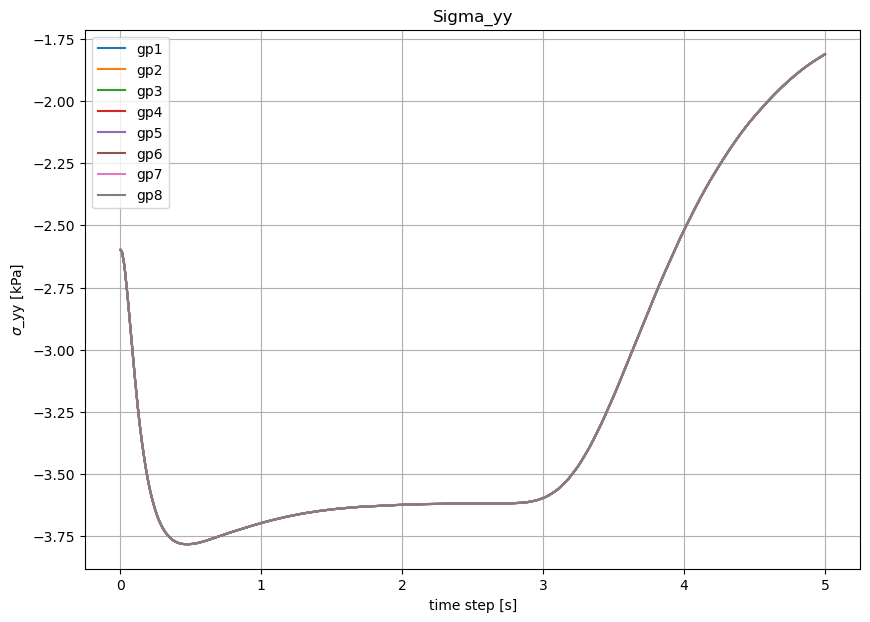

In [143]:
sigma_y = np.c_[sigma_yy[0],sigma_yy[1],sigma_yy[2],sigma_yy[3],sigma_yy[4],sigma_yy[5],sigma_yy[6],sigma_yy[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Sigma_yy')
pwp2.set_ylabel(r'$\sigma$_yy'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,sigma_y,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()
#pwp.show()

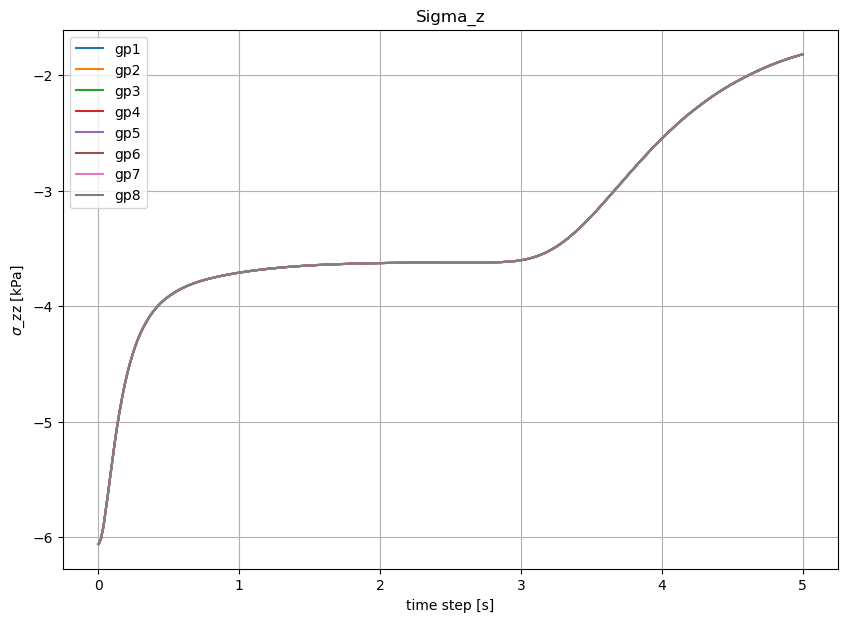

In [144]:
sigma_z = np.c_[sigma_zz[0],sigma_zz[1],sigma_zz[2],sigma_zz[3],sigma_zz[4],sigma_zz[5],sigma_zz[6],sigma_zz[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Sigma_z')
pwp2.set_ylabel(r'$\sigma$_zz'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,sigma_z,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()

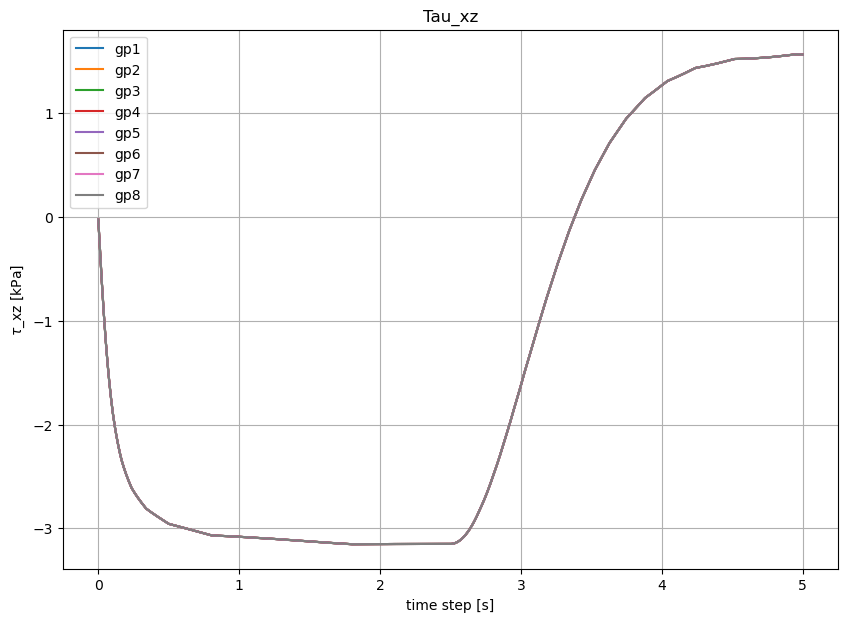

In [145]:
tau_xz = np.c_[sigma_xz[0],sigma_xz[1],sigma_xz[2],sigma_xz[3],sigma_xz[4],sigma_xz[5],sigma_xz[6],sigma_xz[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Tau_xz')
pwp2.set_ylabel(r'$\tau$_xz'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,tau_xz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()

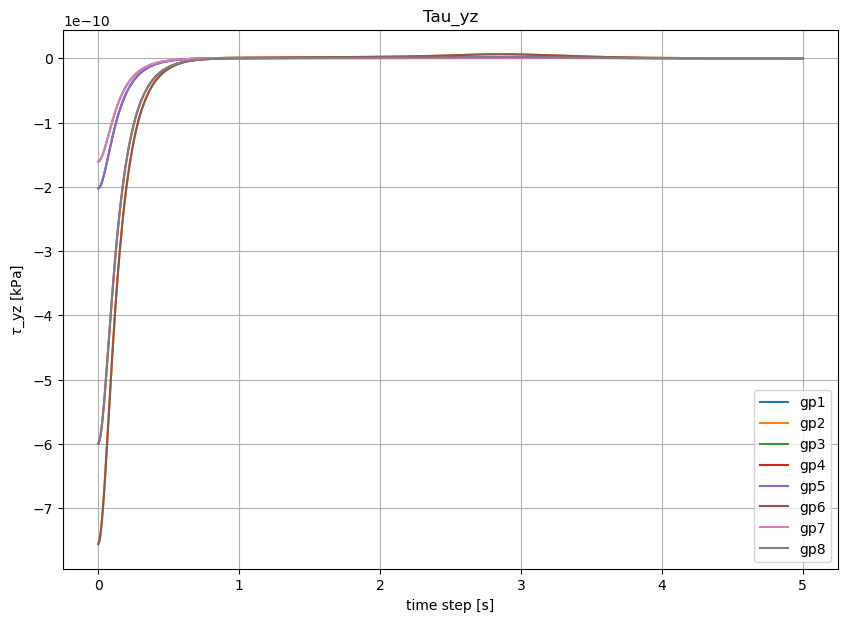

In [146]:
tau_yz = np.c_[sigma_yz[0],sigma_yz[1],sigma_yz[2],sigma_yz[3],sigma_yz[4],sigma_yz[5],sigma_yz[6],sigma_yz[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Tau_yz')
pwp2.set_ylabel(r'$\tau$_yz'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,tau_yz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()

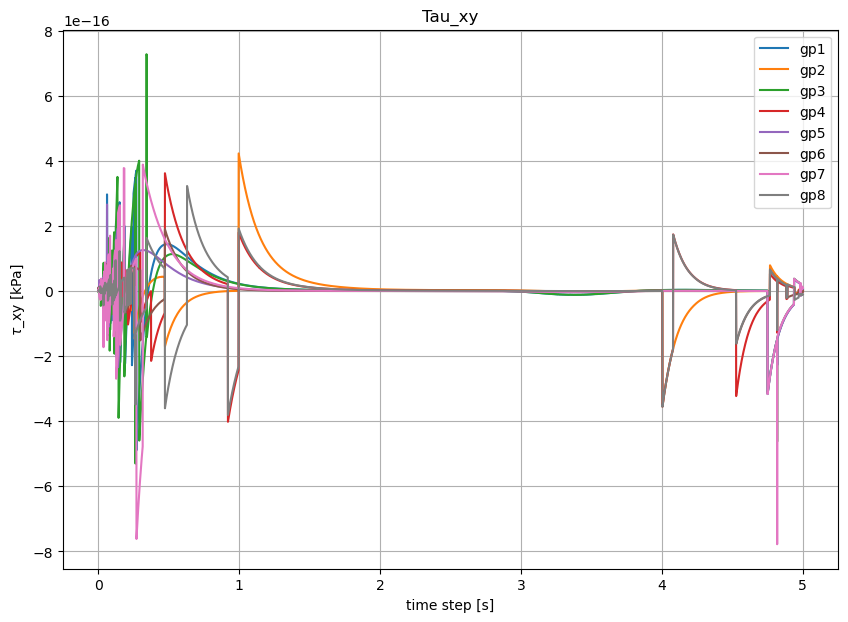

In [147]:
tau_xy = np.c_[sigma_xy[0],sigma_xy[1],sigma_xy[2],sigma_xy[3],sigma_xy[4],sigma_xy[5],sigma_xy[6],sigma_xy[7]]
fig, pwp2 = plt.subplots(figsize=(10,7))
pwp2.set_title('Tau_xy')
pwp2.set_ylabel(r'$\tau$_xy'+' '+'[kPa]')
pwp2.set_xlabel('time step [s]')
pwp2.grid(True)
pwp2.plot(time,tau_xy,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp2.legend()

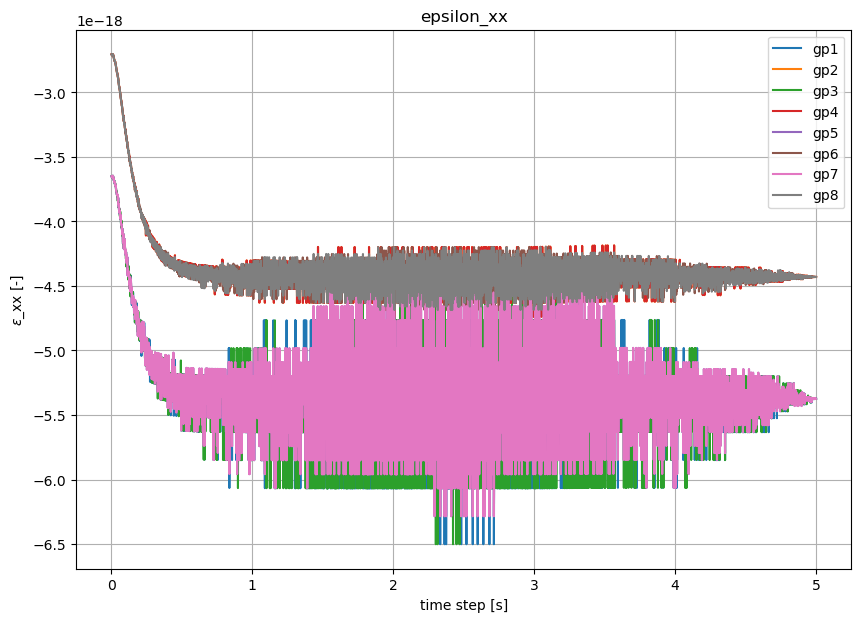

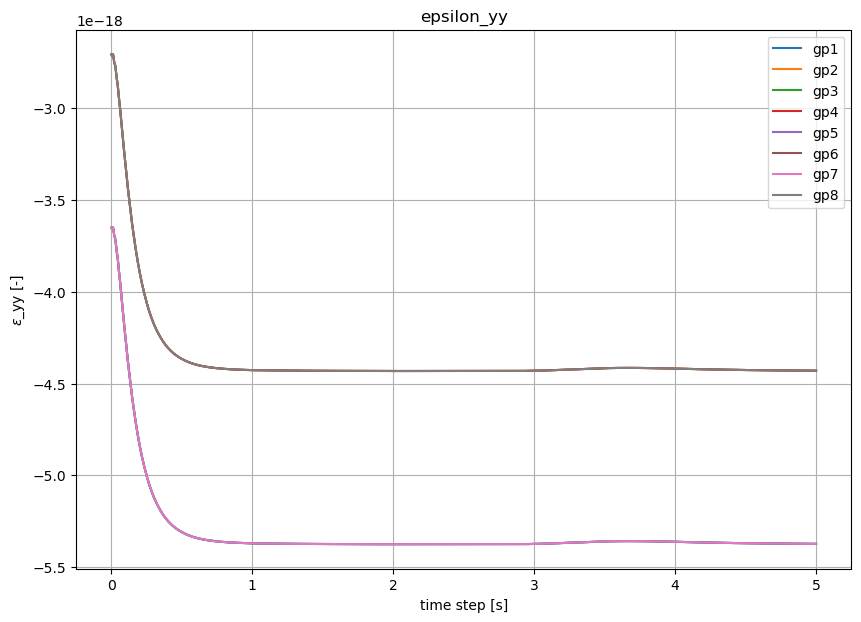

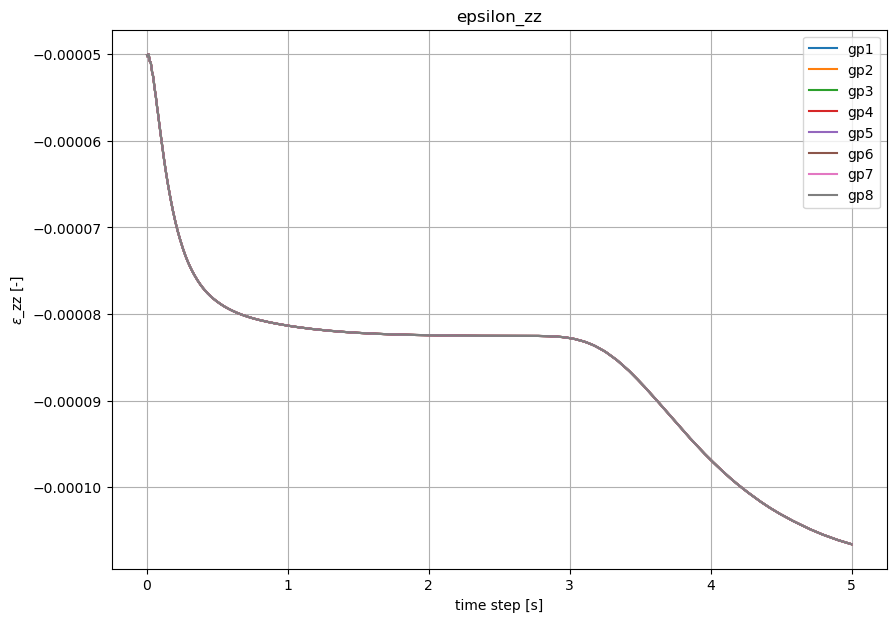

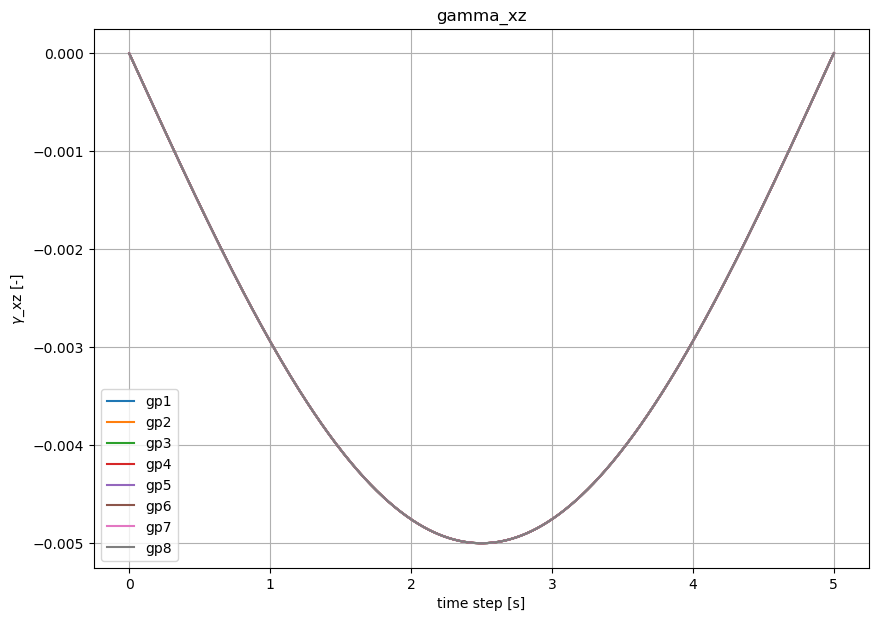

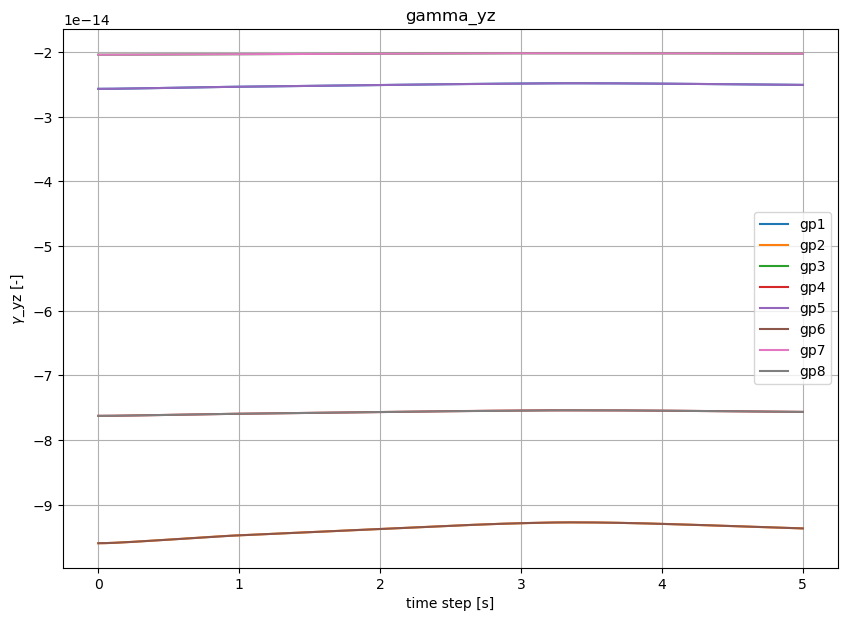

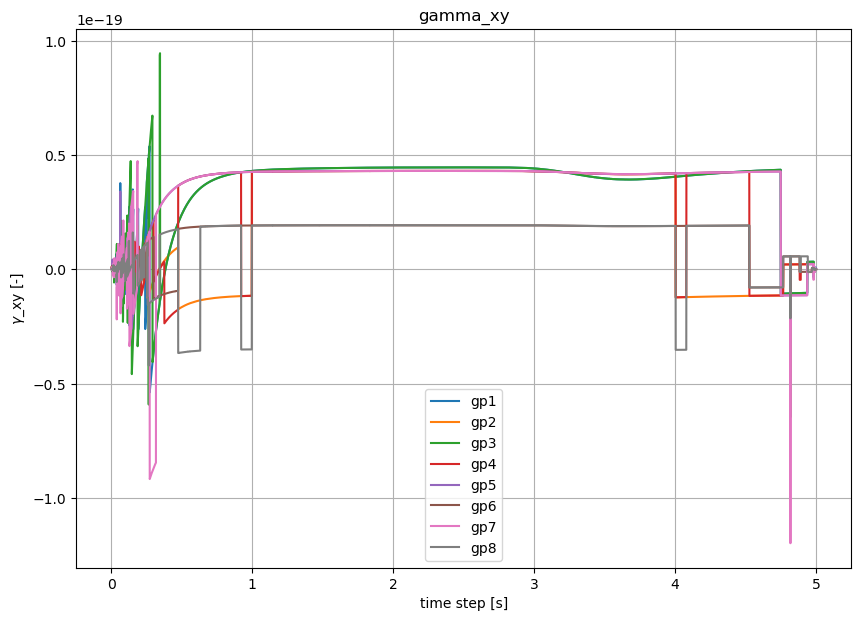

In [148]:
eps_x = np.c_[eps_xx[0],eps_xx[1],eps_xx[2],eps_xx[3],eps_xx[4],eps_xx[5],eps_xx[6],eps_xx[7]]
fig, pwp5 = plt.subplots(figsize=(10,7))
pwp5.set_title('epsilon_xx')
pwp5.set_ylabel(r'$\epsilon$_xx'+' '+'[-]')
pwp5.set_xlabel('time step [s]')
pwp5.grid(True)
pwp5.plot(time,eps_x,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp5.legend()
#pwp.show()

eps_y = np.c_[eps_yy[0],eps_yy[1],eps_yy[2],eps_yy[3],eps_yy[4],eps_yy[5],eps_yy[6],eps_yy[7]]
fig, pwp3 = plt.subplots(figsize=(10,7))
pwp3.set_title('epsilon_yy')
pwp3.set_ylabel(r'$\epsilon$_yy'+' '+'[-]')
pwp3.set_xlabel('time step [s]')
pwp3.grid(True)
pwp3.plot(time,eps_y,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp3.legend()
#pwp.show()

eps_z = np.c_[eps_zz[0],eps_zz[1],eps_zz[2],eps_zz[3],eps_zz[4],eps_zz[5],eps_zz[6],eps_zz[7]]
fig, pwp4 = plt.subplots(figsize=(10,7))
pwp4.set_title('epsilon_zz')
pwp4.set_ylabel(r'$\epsilon$_zz'+' '+'[-]')
pwp4.set_xlabel('time step [s]')
pwp4.grid(True)
pwp4.plot(time,eps_z,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp4.legend()
#pwp.show()

gamma_xz = np.c_[eps_xz[0],eps_xz[1],eps_xz[2],eps_xz[3],eps_xz[4],eps_xz[5],eps_xz[6],eps_xz[7]]
fig, pwp5 = plt.subplots(figsize=(10,7))
pwp5.set_title('gamma_xz')
pwp5.set_ylabel(r'$\gamma$_xz'+' '+'[-]')
pwp5.set_xlabel('time step [s]')
pwp5.grid(True)
pwp5.plot(time,gamma_xz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp5.legend()

gamma_yz = np.c_[eps_yz[0],eps_yz[1],eps_yz[2],eps_yz[3],eps_yz[4],eps_yz[5],eps_yz[6],eps_yz[7]]
fig, pwp6 = plt.subplots(figsize=(10,7))
pwp6.set_title('gamma_yz')
pwp6.set_ylabel(r'$\gamma$_yz'+' '+'[-]')
pwp6.set_xlabel('time step [s]')
pwp6.grid(True)
pwp6.plot(time,gamma_yz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp6.legend()

gamma_xy = np.c_[eps_xy[0],eps_xy[1],eps_xy[2],eps_xy[3],eps_xy[4],eps_xy[5],eps_xy[6],eps_xy[7]]
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('gamma_xy')
pwp7.set_ylabel(r'$\gamma$_xy'+' '+'[-]')
pwp7.set_xlabel('time step [s]')
pwp7.grid(True)
pwp7.plot(time,gamma_xy,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

STRESS:STRAIN

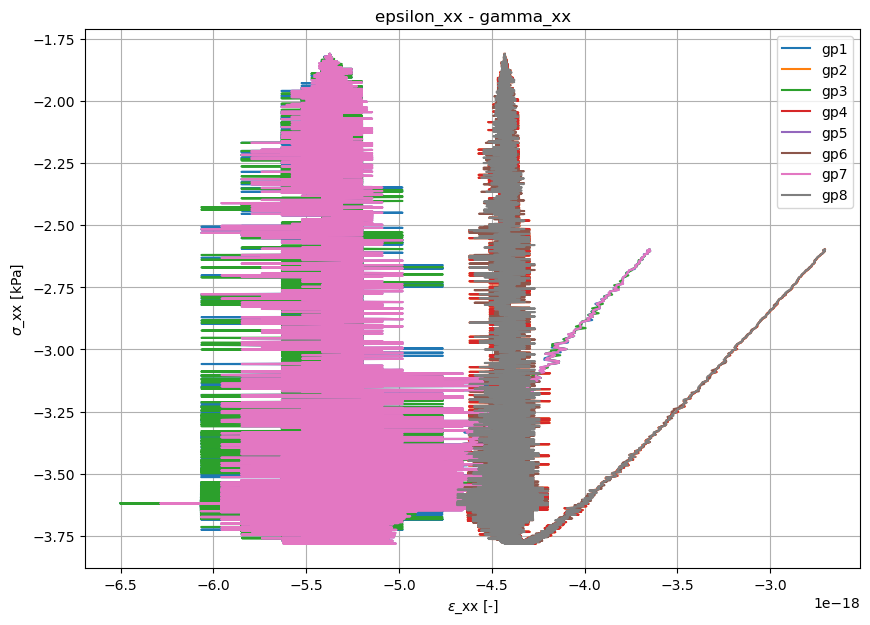

In [149]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('epsilon_xx - gamma_xx')
pwp7.set_xlabel(r'$\epsilon$_xx'+' '+'[-]')
pwp7.set_ylabel(r'$\sigma$_xx'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(eps_x,sigma_x,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

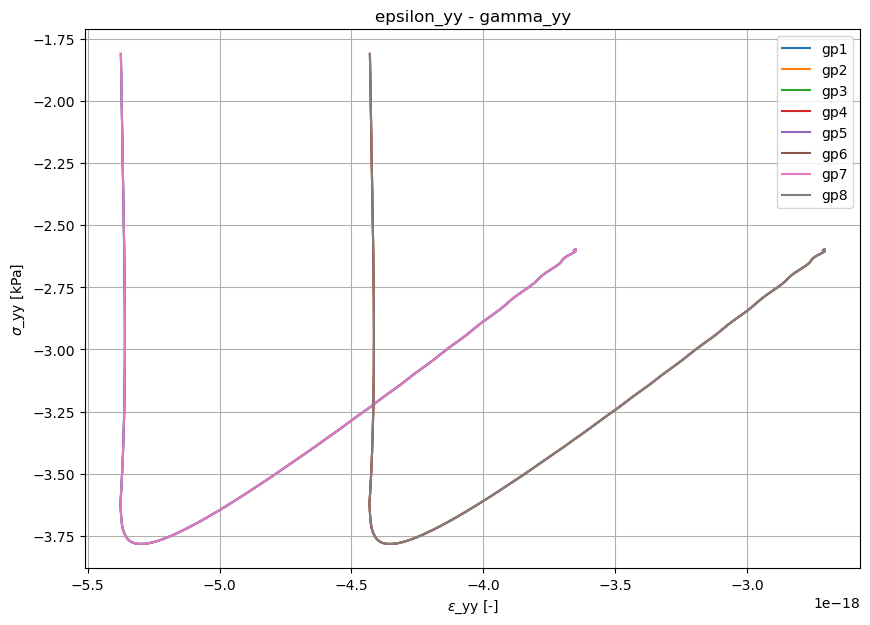

In [150]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('epsilon_yy - gamma_yy')
pwp7.set_xlabel(r'$\epsilon$_yy'+' '+'[-]')
pwp7.set_ylabel(r'$\sigma$_yy'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(eps_y,sigma_y,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

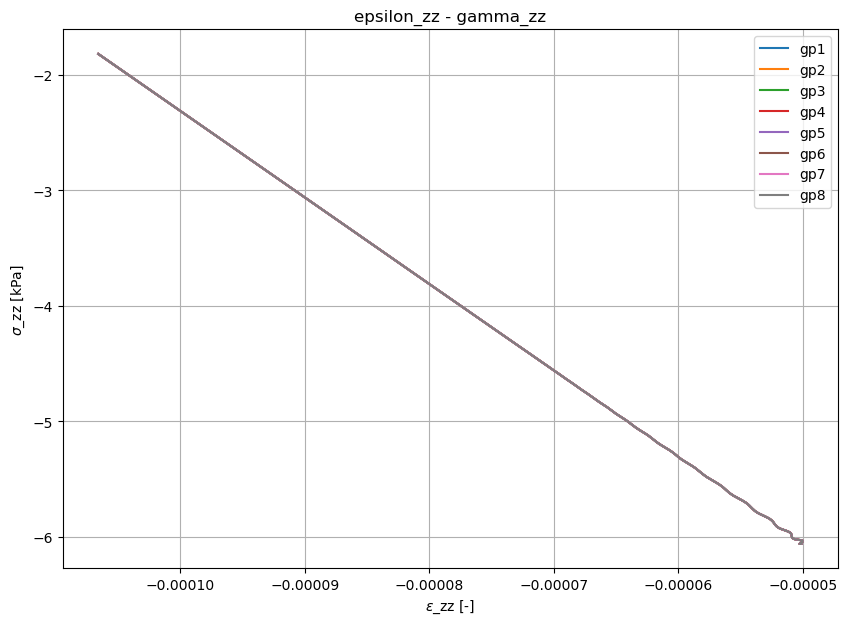

In [151]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('epsilon_zz - gamma_zz')
pwp7.set_xlabel(r'$\epsilon$_zz'+' '+'[-]')
pwp7.set_ylabel(r'$\sigma$_zz'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(eps_z,sigma_z,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

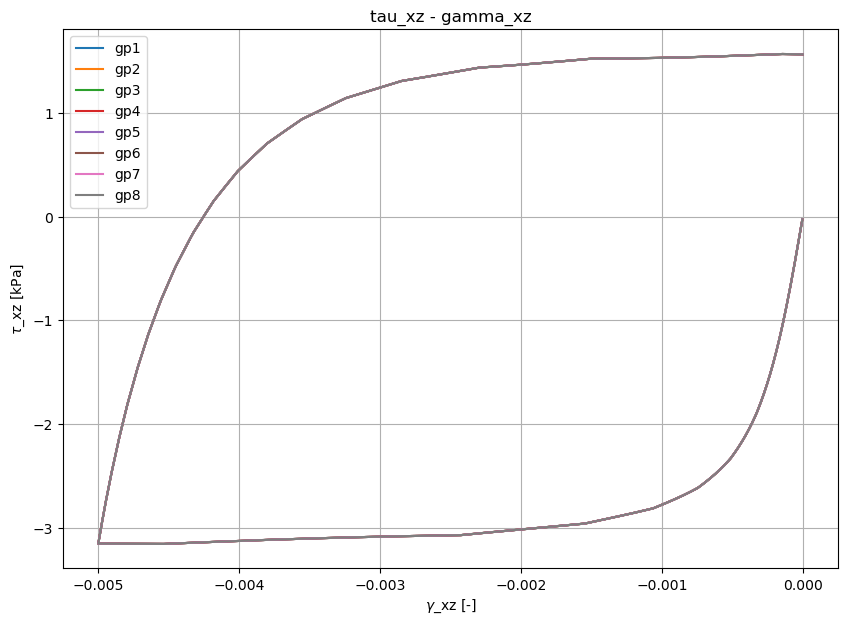

In [152]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('tau_xz - gamma_xz')
pwp7.set_xlabel(r'$\gamma$_xz'+' '+'[-]')
pwp7.set_ylabel(r'$\tau$_xz'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(gamma_xz,tau_xz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

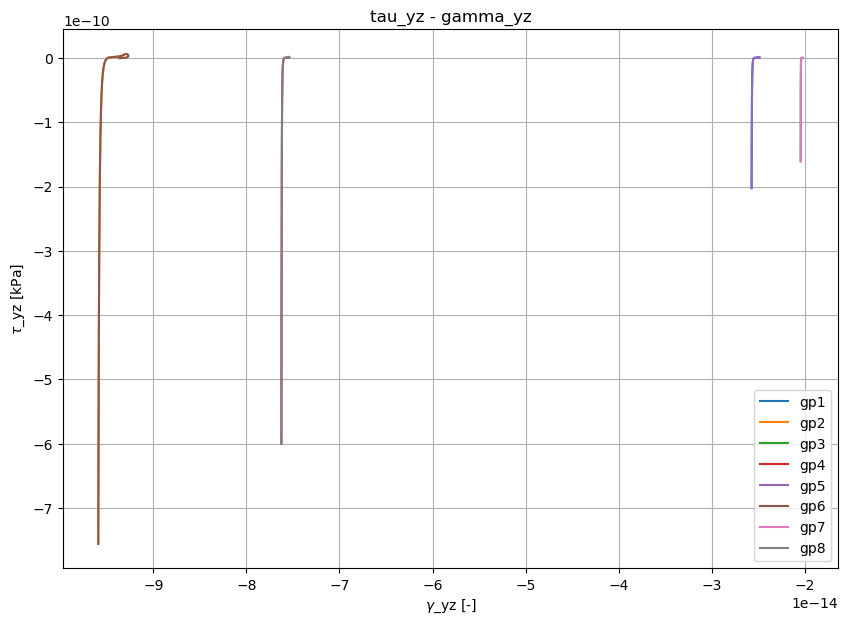

In [153]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('tau_yz - gamma_yz')
pwp7.set_xlabel(r'$\gamma$_yz'+' '+'[-]')
pwp7.set_ylabel(r'$\tau$_yz'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(gamma_yz,tau_yz,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()

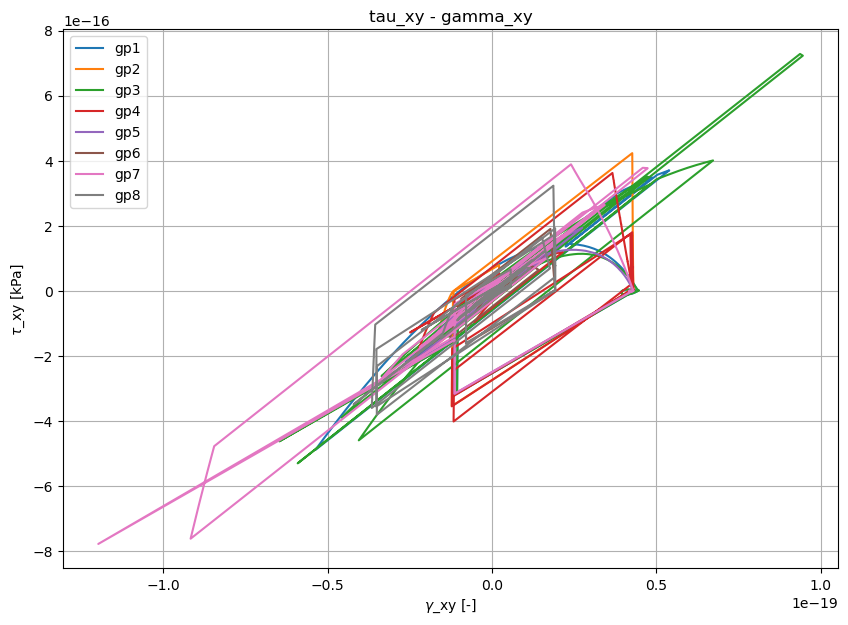

In [154]:
fig, pwp7 = plt.subplots(figsize=(10,7))
pwp7.set_title('tau_xy - gamma_xy')
pwp7.set_xlabel(r'$\gamma$_xy'+' '+'[-]')
pwp7.set_ylabel(r'$\tau$_xy'+' '+'[kPa]')
pwp7.grid(True)
pwp7.plot(gamma_xy,tau_xy,label=['gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8'])
pwp7.legend()